In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import pingouin as pg
sns.set_style("whitegrid")

In [52]:
df = (pg.read_dataset("mixed_anova")
      .query("Group == 'Meditation' and Time != 'January'")
      .drop(["Group"], axis=1)
      .reset_index(drop=True))
df

,Scores,Time,Subject
0,5.579842,August,30
1,5.100035,August,31
2,4.472149,August,32
3,4.915282,August,33
4,6.316594,August,34
5,5.418053,August,35
6,5.155234,August,36
7,6.028288,August,37
8,4.431011,August,38
9,4.988119,August,39


In [ ]:
pg.normality(data=df, alpha= 0.05)

Null: Scores from June and August do not vary.
Alternative: Scored from June and August vary.

In [59]:
df["Month"] = df["Time"].replace({"August": 8, "June":6}).infer_objects(copy=False)
df = df.sort_values("Month", ascending=True)
df

C:\Users\mshin\AppData\Local\Temp\ipykernel_5552\3624528527.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Month"] = df["Time"].replace({"August": 8, "June":6}).infer_objects(copy=False)


,Scores,Time,Subject,Month
30,6.896143,June,30,6
31,7.196595,June,31,6
45,6.625985,June,45,6
44,5.540332,June,44,6
59,7.822986,June,59,6
58,4.990568,June,58,6
57,6.522273,June,57,6
56,8.523692,June,56,6
55,6.176981,June,55,6
54,6.539683,June,54,6


In [69]:
print(df["Month"].dtype)

int64


In [63]:
pg.normality(data=df, dv= "Scores", group="Month", alpha=0.05)

,W,pval,normal
Month,,,
6,0.992021,0.997722,True
8,0.974791,0.676568,True


In [81]:
pg.pairwise_tests(data=df, dv="Scores", within="Month", subject="Subject", effsize="cohen").loc[0, "p-unc"]

np.float64(0.0001434360522040144)

As p-unc is less than alpha, we reject the null hypothesis.

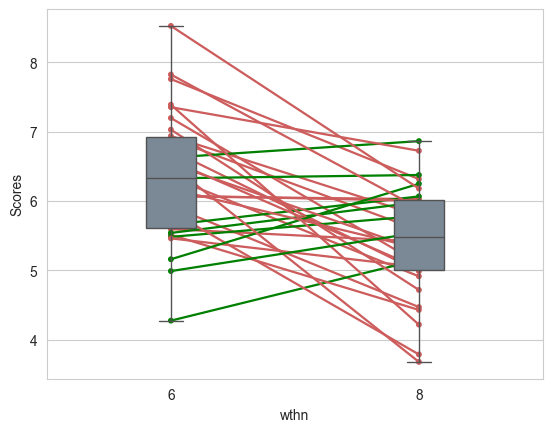

In [ ]:
pg.plot_paired(data=df, dv="Scores", within="Month", subject="Subject",  boxplot_in_front=True, )
plt.show()

However, in more realistic applications you may have more "Months" to analyse.

For example, the previous experiment may have been conducted over more months
Consider the same dataset in the previous example, but now we will consider three months

We will change time to an integer that represents the "month value" and assign it to the Month column

In [3]:
df1 = pg.read_dataset("mixed_anova")
df1

,Scores,Time,Group,Subject
0,5.971435,August,Control,0
1,4.309024,August,Control,1
2,6.932707,August,Control,2
3,5.187348,August,Control,3
4,4.779411,August,Control,4
...,...,...,...,...
175,6.176981,June,Meditation,55
176,8.523692,June,Meditation,56
177,6.522273,June,Meditation,57
178,4.990568,June,Meditation,58


In [98]:
df1["Time"].unique()

array(['August', 'January', 'June'], dtype=object)

In [4]:
df1 = (df1
       .query("Group == 'Meditation'")
       .drop(["Group"], axis=1))
df1["Month"] = df1["Time"].replace({"January":1, "June":6, "August":8}).infer_objects(copy=False)
df1= df1.sort_values("Month", ascending=True)
df1

C:\Users\mshin\AppData\Local\Temp\ipykernel_32872\3070388883.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1["Month"] = df1["Time"].replace({"January":1, "June":6, "August":8}).infer_objects(copy=False)


,Scores,Time,Subject,Month
120,5.551568,January,30,1
121,5.182293,January,31,1
135,4.837971,January,45,1
134,6.439633,January,44,1
149,8.165769,January,59,1
...,...,...,...,...
111,3.789285,August,51,8
108,6.724574,August,48,8
109,4.218892,August,49,8
117,3.681501,August,57,8


there data is not normally distributed

In [109]:
pg.normality(data=df1, dv="Scores", group="Month", alpha=0.05)

,W,pval,normal
Month,,,
1,0.978803,0.792915,True
6,0.992021,0.997722,True
8,0.974791,0.676568,True


there is no difference in scores between months

In [6]:
pg.pairwise_tests(data=df1, dv="Scores", within="Month", subject="Subject", effsize="cohen")

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,cohen
0,Month,1,6,True,True,-1.438842,29.0,two-sided,0.160902,0.492,-0.372253
1,Month,1,8,True,True,2.022993,29.0,two-sided,0.052379,1.153,0.564895
2,Month,6,8,True,True,4.374791,29.0,two-sided,0.000143,187.445,1.043147


I reject the null hypothesis for months for month June and August as there is a significant diffeence in scores between these months.

<Axes: xlabel='wthn', ylabel='Scores'>

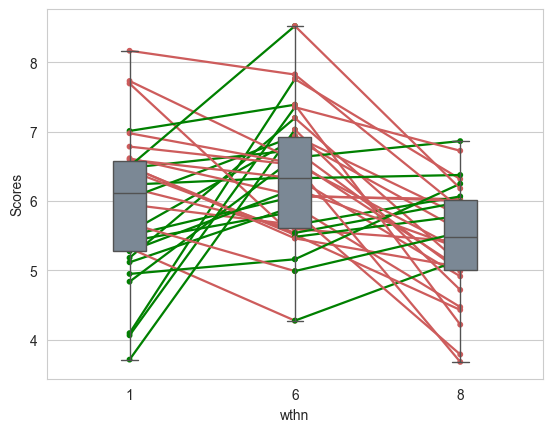

In [7]:
pg.plot_paired(data=df1, dv="Scores", within="Month", subject="Subject")